In [69]:
!pip install opencv-python

In [70]:
!pip install tqdm


In [71]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm

In [72]:
!pip install kagglehub

In [73]:
import kagglehub
dataset = kagglehub.dataset_download('ashishsaxena2209/animal-image-datasetdog-cat-and-panda')
print('images downloaded')

images downloaded


In [74]:
#image catagories
dataset = os.path.join(dataset,'animals')
print(os.listdir(dataset))

['animals', 'cats', 'dogs', 'images', 'panda']


In [75]:
categories = os.listdir(dataset)
print(categories)

['animals', 'cats', 'dogs', 'images', 'panda']


In [76]:
dataset = os.path.join(dataset,'animals')
print(os.listdir(dataset))

['cats', 'dogs', 'panda']


In [77]:
categories = os.listdir(dataset)
print(categories)

['cats', 'dogs', 'panda']


In [78]:
print([os.listdir(os.path.join(dataset, category)) for category in categories])

[['cats_00001.jpg', 'cats_00002.jpg', 'cats_00003.jpg', 'cats_00004.jpg', 'cats_00005.jpg', 'cats_00006.jpg', 'cats_00007.jpg', 'cats_00008.jpg', 'cats_00009.jpg', 'cats_00010.jpg', 'cats_00011.jpg', 'cats_00012.jpg', 'cats_00013.jpg', 'cats_00014.jpg', 'cats_00015.jpg', 'cats_00016.jpg', 'cats_00017.jpg', 'cats_00018.jpg', 'cats_00019.jpg', 'cats_00020.jpg', 'cats_00021.jpg', 'cats_00022.jpg', 'cats_00023.jpg', 'cats_00024.jpg', 'cats_00025.jpg', 'cats_00026.jpg', 'cats_00027.jpg', 'cats_00028.jpg', 'cats_00029.jpg', 'cats_00030.jpg', 'cats_00031.jpg', 'cats_00032.jpg', 'cats_00033.jpg', 'cats_00034.jpg', 'cats_00035.jpg', 'cats_00036.jpg', 'cats_00037.jpg', 'cats_00038.jpg', 'cats_00039.jpg', 'cats_00040.jpg', 'cats_00041.jpg', 'cats_00042.jpg', 'cats_00043.jpg', 'cats_00044.jpg', 'cats_00045.jpg', 'cats_00046.jpg', 'cats_00047.jpg', 'cats_00048.jpg', 'cats_00049.jpg', 'cats_00050.jpg', 'cats_00051.jpg', 'cats_00052.jpg', 'cats_00053.jpg', 'cats_00054.jpg', 'cats_00055.jpg', 'cats_00

In [79]:
#training images
import random
train_data = []

for index, category in enumerate(categories):
    label = index
    path = os.path.join(dataset, category)
    images = os.listdir(path)
    random.shuffle(images)

    for img in images[:100]:
        img_path = os.path.join(path, img)
        img_bgr = cv2.imread(img_path)
        img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
        img_gray = cv2.resize(img_gray, (100, 100))
        train_data.append([img_gray, label])

In [80]:
np.random.shuffle(train_data)
print([train_data[i][1] for i in range(10)])

[1, 0, 0, 2, 1, 1, 1, 2, 0, 0]


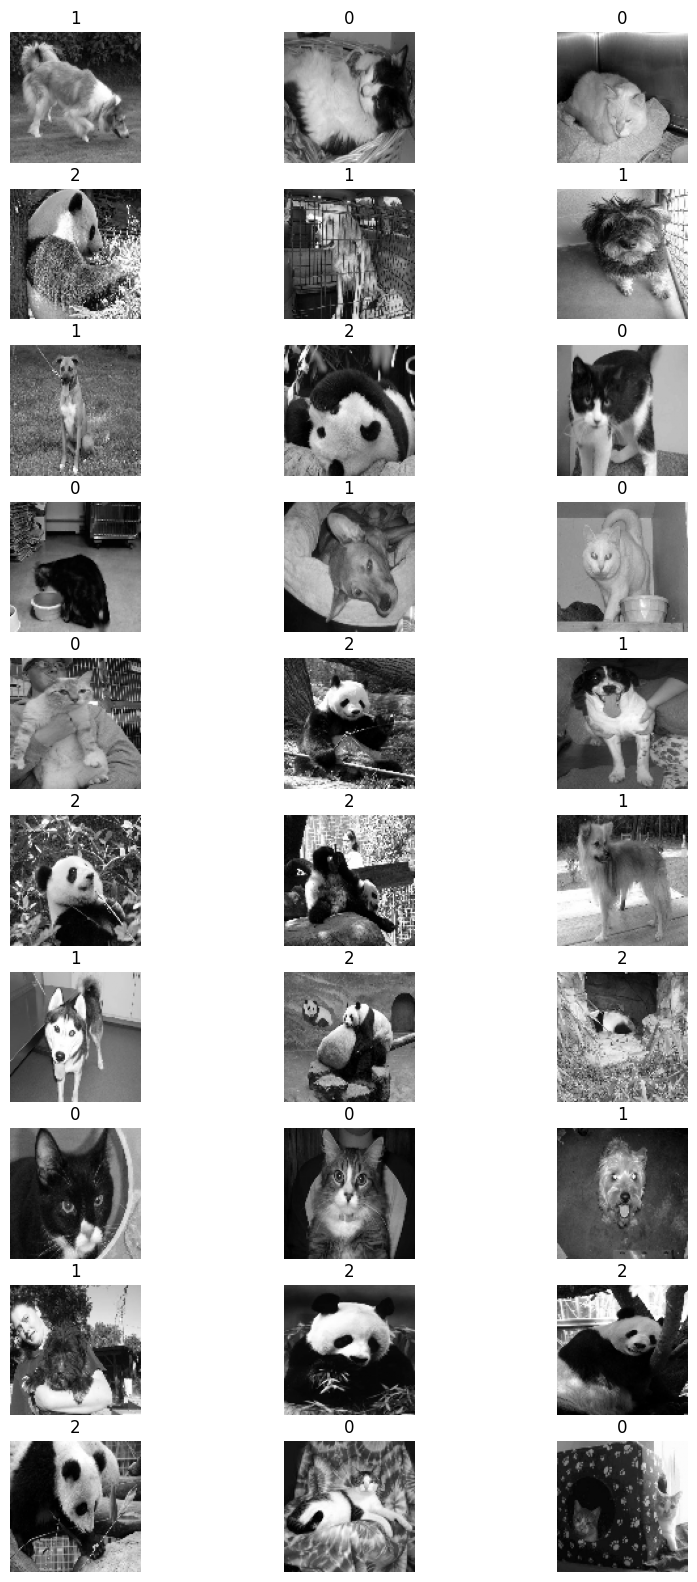

In [81]:
#viewing the images
fig, axes = plt.subplots(10, 3, figsize=(10,20))

for i, ax in enumerate(axes.flat):
    img_array, label = train_data[i]
    ax.imshow(img_array, cmap='gray')
    ax.set_title(label)
    ax.axis('off')
plt.show()

In [82]:
#train_data is being divided into 5 folds for cross-validation
folds = []
for i in range(5):
    folds.append(train_data[i::5])

len(folds)

5

In [83]:
#repeating through each fold, extract labels, and print the fold number and its labels
for fold_index in range(len(folds)):
    fold = folds[fold_index]
    labels = [label for _, label in fold]
    print(f'Fold{fold_index + 1}:')
    print(f'Labels: {labels}')

Fold1:
Labels: [1, 1, 1, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 2, 1, 2, 0, 0, 2, 2, 1, 2, 0, 0, 1, 0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 1, 2, 0, 0, 1, 0, 2, 1]
Fold2:
Labels: [0, 1, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 1, 0, 1, 2, 1, 1, 1, 1, 1, 2, 0, 1, 2, 2, 2, 2, 1, 1, 1, 2, 0, 2, 1, 0, 0, 2, 2, 1, 1, 1, 0, 0, 1, 2, 2, 0, 0, 2, 0, 1, 2, 1, 2, 1, 0, 2, 1]
Fold3:
Labels: [0, 2, 0, 1, 0, 2, 1, 2, 1, 1, 2, 0, 1, 1, 0, 1, 0, 2, 2, 0, 2, 1, 1, 0, 0, 1, 0, 2, 2, 1, 1, 0, 0, 0, 0, 0, 2, 1, 2, 2, 2, 1, 0, 1, 1, 0, 2, 1, 0, 2, 0, 1, 1, 0, 2, 2, 2, 1, 2, 1]
Fold4:
Labels: [2, 0, 2, 1, 1, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 0, 0, 2, 1, 1, 2, 0, 1, 2, 0, 1, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0]
Fold5:
Labels: [1, 0, 1, 2, 1, 0, 2, 0, 0, 1, 0, 1, 2, 0, 1, 2, 2, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 1, 2, 0, 1, 1, 0, 2, 0, 1, 2, 0, 0, 1, 0, 2, 1, 0, 2, 0, 1, 0, 0, 2, 1, 1, 0, 1, 0, 2, 2]


In [84]:
def l2_distance(valid_img, train_img):
    # Calculate the element-wise difference between the two images
    difference = valid_img - train_img
    
    squared_difference = np.square(difference)

    summed_squares = np.sum(squared_difference)

    distance = np.sqrt(summed_squares)

    return distance


def l1_distance(valid_img, train_img):
    # Calculate the element-wise absolute difference between the two images
    difference = np.abs(valid_img - train_img)

    distance = np.sum(difference)

    return distance

In [85]:
from collections import Counter  # Importing the Counter class to count the occurrences of labels

def knn_prediction(distances, k=1):
    nearest_neighbors = distances[:k] # Get the k nearest neighbors based on the provided distances

    labels = [label for _, label in nearest_neighbors]  # Extract the labels of the nearest neighbors

    label_counts = Counter(labels) # Count the occurrences of each label using Counter

    most_common_label = label_counts.most_common(1)[0][0]

    return most_common_label


In [86]:
fold_accuracies_2 = [] # List to store accuracies for each fold and each value of k
avg_accuracies_2 = [] # List to store average accuracy for each value of k

# Loop through different values of k (1 to 30 for k-NN)
for k in range(1, 31):
    accuracies = [] # List to store accuracy for each fold for a particular value of k
    
# Loop over each fold for cross-validation (leave-one-out fold)
    for i in range(len(folds) - 1, -1, -1):
        valid_set = folds[i] # Select the validation set (current fold)

# Create the training set by combining all folds except the current validation fold
        train_set = [
            item for j, fold in enumerate(folds) if j != i for item in fold
        ]

        predictions = [] # List to store the prediction results for the current fold

# Loop through each image in the validation set
        for valid_img in valid_set:
# Calculate L2 distances between the validation image and all training images
            l2_distances = [
                (l2_distance(valid_img[0], train_img[0]), train_img[1])
                for train_img in train_set
            ]
            l2_distances.sort() # Sort the distances in ascending order

# Use the k-NN prediction function to get the predicted label for the validation image
            predicted_label = knn_prediction(l2_distances, k)
# Check if the predicted label matches the true label of the validation image
            predictions.append(1 if predicted_label == valid_img[1] else 0)

# Calculate the accuracy for this fold (percentage of correct predictions)
        fold_accuracy = sum(predictions) / len(predictions)
        accuracies.append(fold_accuracy)
        
# Store the accuracies for all folds for the current value of k
    fold_accuracies_2.append(accuracies)
# Calculate the average accuracy for the current value of k across all folds
    avg_accuracy = sum(accuracies) / len(accuracies)
    avg_accuracies_2.append(avg_accuracy)
    
# Print the results for the current value of k
    print(f"\nK = {k}:")
    print(f"  Average Accuracy: {avg_accuracy:.2f}")


K = 1:
  Average Accuracy: 0.44

K = 2:
  Average Accuracy: 0.44

K = 3:
  Average Accuracy: 0.45

K = 4:
  Average Accuracy: 0.44

K = 5:
  Average Accuracy: 0.47

K = 6:
  Average Accuracy: 0.47

K = 7:
  Average Accuracy: 0.49

K = 8:
  Average Accuracy: 0.50

K = 9:
  Average Accuracy: 0.50

K = 10:
  Average Accuracy: 0.49

K = 11:
  Average Accuracy: 0.49

K = 12:
  Average Accuracy: 0.49

K = 13:
  Average Accuracy: 0.48

K = 14:
  Average Accuracy: 0.47

K = 15:
  Average Accuracy: 0.49

K = 16:
  Average Accuracy: 0.49

K = 17:
  Average Accuracy: 0.48

K = 18:
  Average Accuracy: 0.51

K = 19:
  Average Accuracy: 0.51

K = 20:
  Average Accuracy: 0.48

K = 21:
  Average Accuracy: 0.49

K = 22:
  Average Accuracy: 0.50

K = 23:
  Average Accuracy: 0.49

K = 24:
  Average Accuracy: 0.49

K = 25:
  Average Accuracy: 0.49

K = 26:
  Average Accuracy: 0.49

K = 27:
  Average Accuracy: 0.49

K = 28:
  Average Accuracy: 0.47

K = 29:
  Average Accuracy: 0.49

K = 30:
  Average Accu

In [87]:
fold_accuracies_1 = []  # List to store accuracies for each fold and each value of k
avg_accuracies_1 = []  # List to store average accuracy for each value of k

# Loop through different values of k (1 to 30 for k-NN)
for k in range(1, 31):
    accuracies = []  # List to store accuracy for each fold for a particular value of k

# Loop over each fold for cross-validation (leave-one-out fold)
    for i in range(len(folds) - 1, -1, -1):
        valid_set = folds[i]  # Select the validation set (current fold)

# Create the training set by combining all folds except the current validation fold
        train_set = [
            item for j, fold in enumerate(folds) if j != i for item in fold
        ]

        predictions = []  # List to store the prediction results for the current fold

# Loop through each image in the validation set
        for valid_img in valid_set:
# Calculate L1 distances between the validation image and all training images
            l1_distances = [
                (l1_distance(valid_img[0], train_img[0]), train_img[1])
                for train_img in train_set
            ]
            l1_distances.sort()  # Sort the distances in ascending order

# Use the k-NN prediction function to get the predicted label for the validation image
            predicted_label = knn_prediction(l1_distances, k)
# Check if the predicted label matches the true label of the validation image
            predictions.append(1 if predicted_label == valid_img[1] else 0)

# Calculate the accuracy for this fold (percentage of correct predictions)
        fold_accuracy = sum(predictions) / len(predictions)
        accuracies.append(fold_accuracy)

# Store the accuracies for all folds for the current value of k
    fold_accuracies_1.append(accuracies)
# Calculate the average accuracy for the current value of k across all folds
    avg_accuracy = sum(accuracies) / len(accuracies)
    avg_accuracies_1.append(avg_accuracy)

# Print the results for the current value of k
    print(f"\nK = {k}:")
    print(f"  Average Accuracy: {avg_accuracy:.2f}")


K = 1:
  Average Accuracy: 0.39

K = 2:
  Average Accuracy: 0.39

K = 3:
  Average Accuracy: 0.35

K = 4:
  Average Accuracy: 0.36

K = 5:
  Average Accuracy: 0.37

K = 6:
  Average Accuracy: 0.38

K = 7:
  Average Accuracy: 0.38

K = 8:
  Average Accuracy: 0.38

K = 9:
  Average Accuracy: 0.38

K = 10:
  Average Accuracy: 0.39

K = 11:
  Average Accuracy: 0.40

K = 12:
  Average Accuracy: 0.38

K = 13:
  Average Accuracy: 0.36

K = 14:
  Average Accuracy: 0.40

K = 15:
  Average Accuracy: 0.37

K = 16:
  Average Accuracy: 0.39

K = 17:
  Average Accuracy: 0.36

K = 18:
  Average Accuracy: 0.38

K = 19:
  Average Accuracy: 0.36

K = 20:
  Average Accuracy: 0.35

K = 21:
  Average Accuracy: 0.37

K = 22:
  Average Accuracy: 0.37

K = 23:
  Average Accuracy: 0.35

K = 24:
  Average Accuracy: 0.38

K = 25:
  Average Accuracy: 0.37

K = 26:
  Average Accuracy: 0.38

K = 27:
  Average Accuracy: 0.39

K = 28:
  Average Accuracy: 0.39

K = 29:
  Average Accuracy: 0.38

K = 30:
  Average Accu

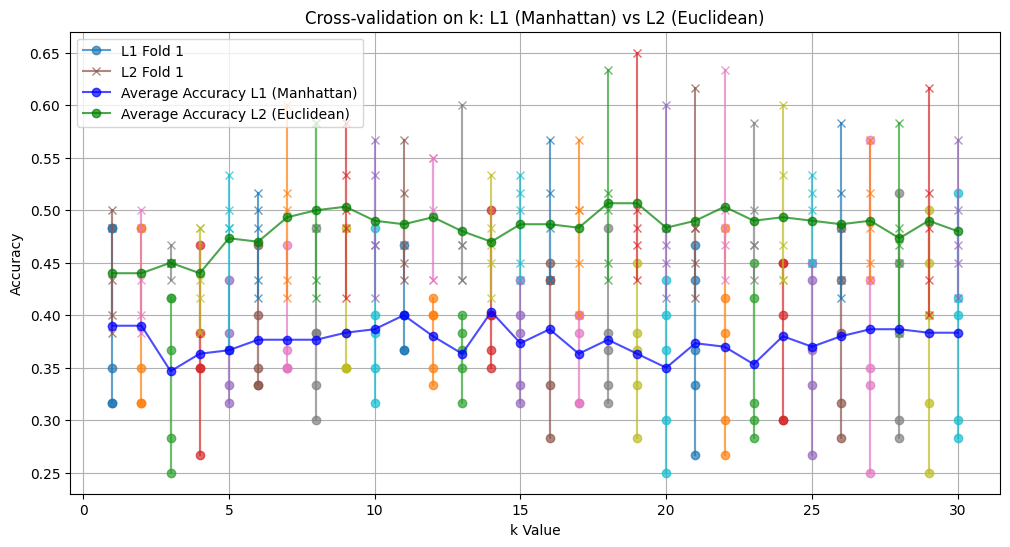

In [88]:
plt.figure(figsize=(12, 6))

colors = plt.cm.tab10.colors

for k in range(30):
    fold_accuracy_l1 = fold_accuracies_1[k]
    plt.plot([k + 1] * len(fold_accuracy_l1), fold_accuracy_l1, linestyle='-', marker='o', alpha=0.7, color=colors[k % len(colors)], label=f'L1 Fold {k+1}' if k == 0 else "")

    fold_accuracy_l2 = fold_accuracies_2[k]
    plt.plot([k + 1] * len(fold_accuracy_l2), fold_accuracy_l2, linestyle='-', marker='x', alpha=0.7, color=colors[(k+5) % len(colors)], label=f'L2 Fold {k+1}' if k == 0 else "")

plt.plot(range(1, 31), avg_accuracies_1, color='blue', alpha=0.7, label='Average Accuracy L1 (Manhattan)', linestyle='-', marker='o')
plt.plot(range(1, 31), avg_accuracies_2, color='green', alpha=0.7, label='Average Accuracy L2 (Euclidean)', linestyle='-', marker='o')

plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('Cross-validation on k: L1 (Manhattan) vs L2 (Euclidean)')

plt.grid(True)
plt.legend()

plt.show()